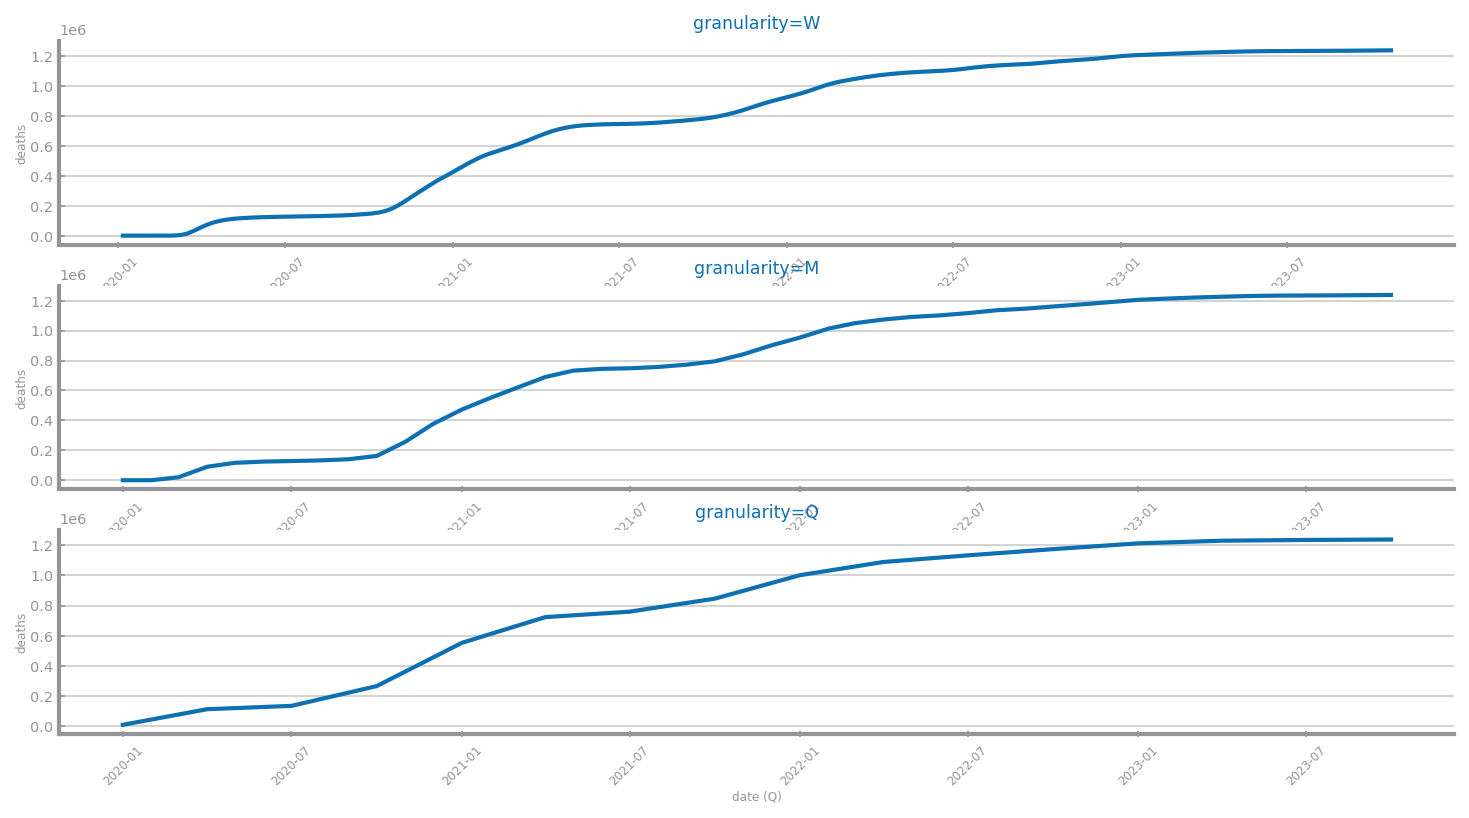

In [1]:
from numpy import sum, mean, median
from pandas import DataFrame, Series, read_csv
from matplotlib.pyplot import figure, show, savefig
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

file_tag = "COVID-19"
filename = "data/time_series/forecast_covid_single.csv"
index = "date"
target = "deaths"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

grans = ["W", "M", "Q"]
ss = [ts_aggregation_by(series, gran_level=gran, agg_func=mean) for gran in grans]

# for i in range(len(grans)):
#     ss: Series = ts_aggregation_by(series, gran_level=grans[i], agg_func=sum)
#     figure(figsize=(3 * HEIGHT, HEIGHT))
#     plot_line_chart(
#         ss.index.to_list(),
#         ss.to_list(),
#         xlabel=grans[i],
#         ylabel=target,
#         title=f"{file_tag} {grans[i]}ly {target}",
#     )
# savefig(f"images/{file_tag}_{target}.png")
# show()

from matplotlib.pyplot import subplots

fig, axs = subplots(len(grans), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(grans)))
for i in range(len(grans)):
    ss: Series = ts_aggregation_by(series, grans[i])
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"{ss.index.name} ({grans[i]})",
        ylabel=target,
        title=f"granularity={grans[i]}",
    )
savefig(f"images/111{file_tag}_{target}_aggregation_study.png")
show()



# ss_years: Series = ts_aggregation_by(series, gran_level="Y", agg_func=median)

# figure(figsize=(3 * HEIGHT, HEIGHT))
# plot_line_chart(
#     ss_years.index.to_list(),
#     ss_years.to_list(),
#     xlabel="years",
#     ylabel=target,
#     title=f"{file_tag} yearly {target}",
# )
# savefig(f"images/{file_tag}_yearly_{target}.png")
# show()

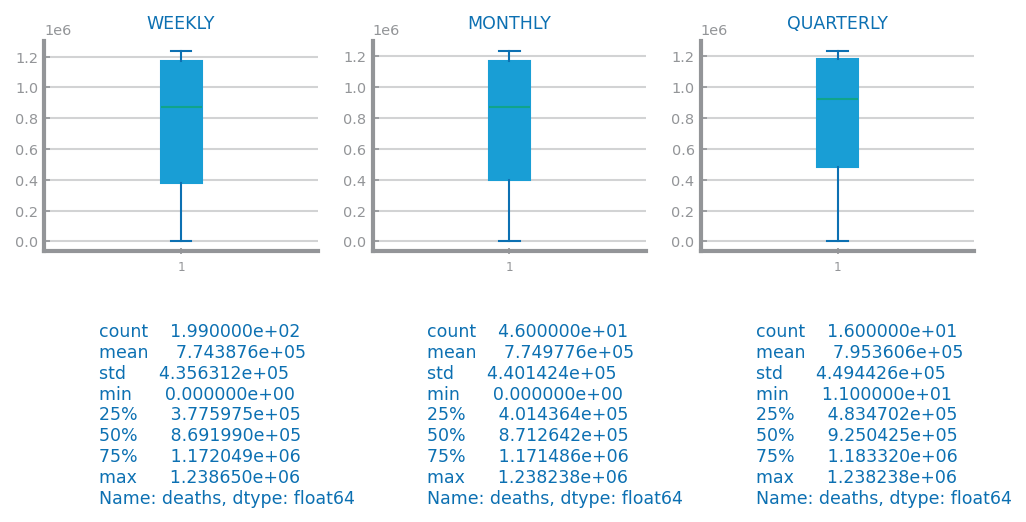

In [5]:
from numpy import array
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
from dslabs_functions import set_chart_labels

ss_weeks: Series = ts_aggregation_by(series, gran_level="W", agg_func=median)
ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func=median)
ss_quarters: Series = ts_aggregation_by(series, gran_level="Q", agg_func=median)

fig: Figure
axs: array
fig, axs = subplots(2, 3, figsize=(2 * HEIGHT, HEIGHT))
set_chart_labels(axs[0, 0], title="WEEKLY")
axs[0, 0].boxplot(series)
set_chart_labels(axs[0, 1], title="MONTHLY")
axs[0, 1].boxplot(ss_months)
set_chart_labels(axs[0, 2], title="QUARTERLY")
axs[0, 2].boxplot(ss_quarters)

axs[1, 0].grid(False)
axs[1, 0].set_axis_off()
axs[1, 0].text(0.2, 0, str(series.describe()), fontsize="small")

axs[1, 1].grid(False)
axs[1, 1].set_axis_off()
axs[1, 1].text(0.2, 0, str(ss_months.describe()), fontsize="small")

axs[1, 2].grid(False)
axs[1, 2].set_axis_off()
axs[1, 2].text(0.2, 0, str(ss_quarters.describe()), fontsize="small")


savefig(f"images/{file_tag}_boxplot_{target}.png")
show()

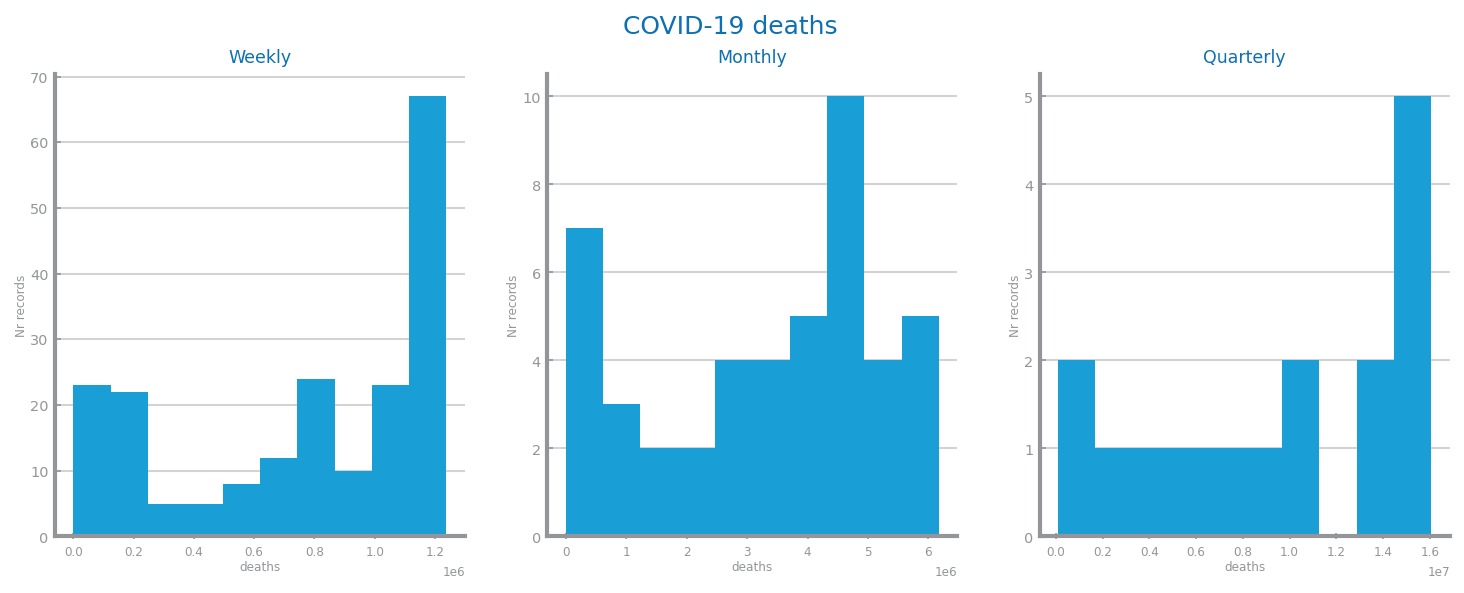

In [6]:
ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func=sum)
ss_quarters: Series = ts_aggregation_by(series, gran_level="Q", agg_func=sum)

grans: list[Series] = [series, ss_months, ss_quarters]
gran_names: list[str] = ["Weekly", "Monthly", "Quarterly"]
fig: Figure
axs: array
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag} {target}")
for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)
savefig(f"images/112{file_tag}_histogram_{target}.png")
show()

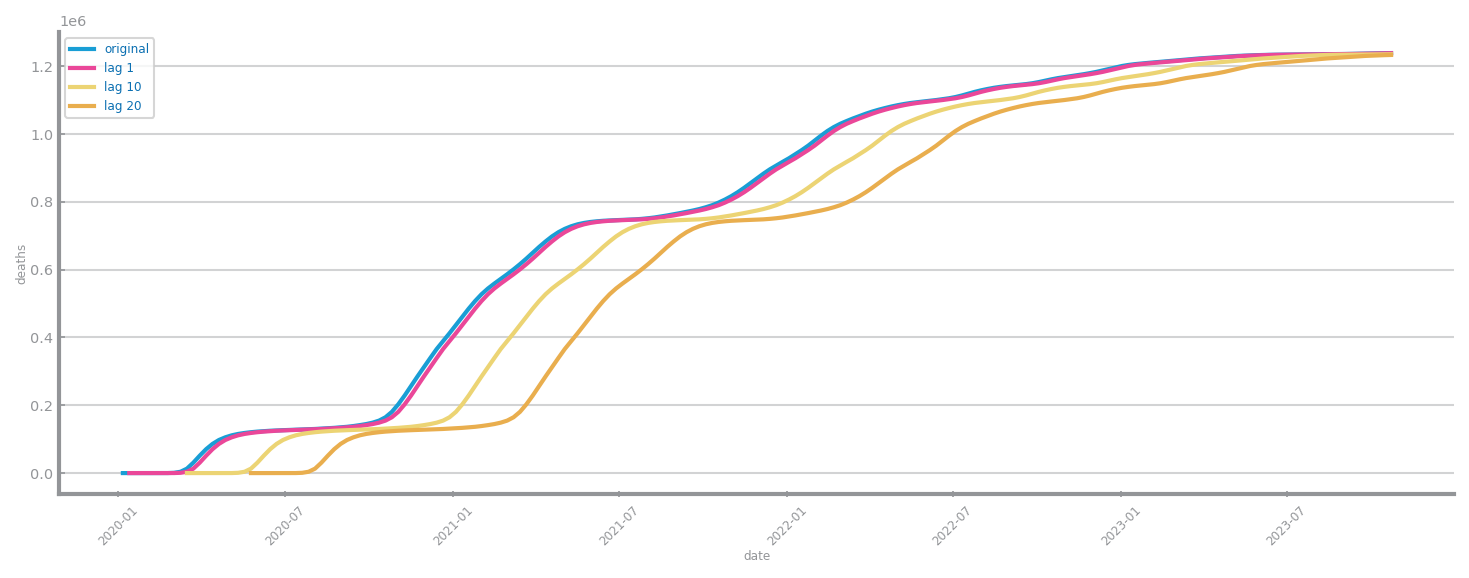

In [15]:
from dslabs_functions import plot_multiline_chart


def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)
savefig(f"images/113{file_tag}_lags_{target}.png")

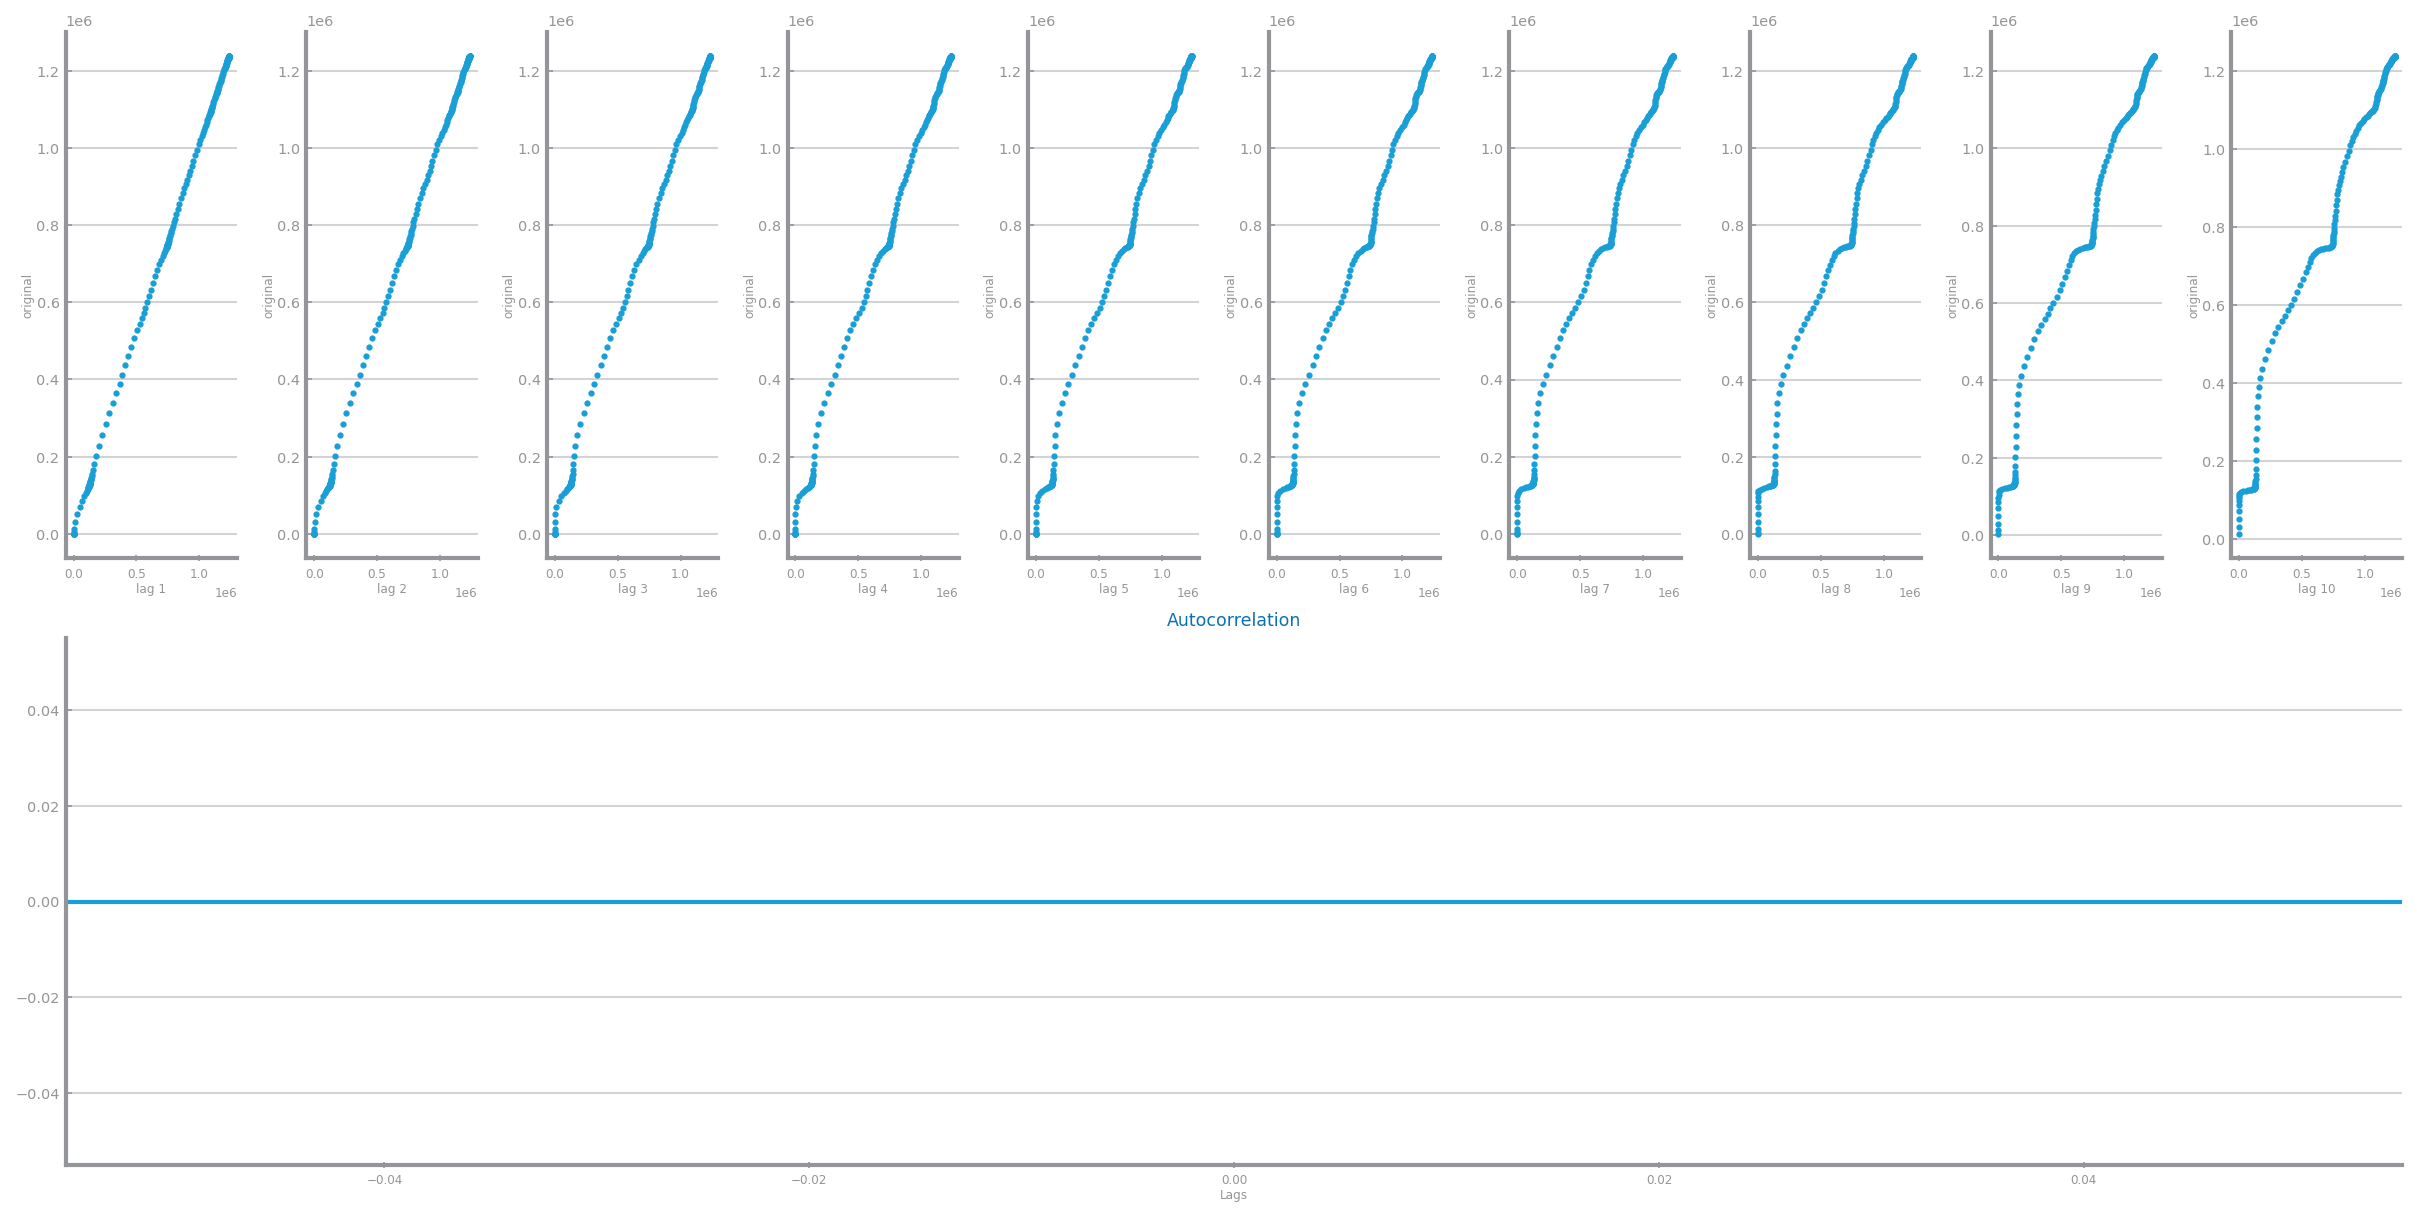

In [16]:
from matplotlib.pyplot import setp
from matplotlib.gridspec import GridSpec


def autocorrelation_study(series: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag}")
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags")
    return


autocorrelation_study(series, 10, 1)
savefig(f"images/114{file_tag}_autocorrelation_{target}.png")